# Song Recommender System
Here we are Building the Song Recommender System, On Both Popularity Based Recommendation and Item Similarity Based Recommender System
## Recommender Systems:
###   --> Collabrative Recommender
`Recommendes Based On Other Users Think`
###   --> Content Based Recommender
`Recommendes Based On Your Past Data`

<hr>

## Dataset User:
#### Million Songs Dataset
Source: http://labrosa.ee.columbia.edu/millionsong/ <br>
Paper: http://ismir2011.ismir.net/papers/OS6-1.pdf <br>


In [57]:
#Importing the Modules
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time
import recommenders0001 as recommender
%matplotlib inline

## Loading the Song Dataset

In [2]:
#Downloading the Dataset from the Repository
#https://static.turi.com/datasets/millionsong/10000.txt is the Source of User Data File
user_song_metadata = "song_data.csv"
triplets_file = "https://static.turi.com/datasets/millionsong/10000.txt"

meta_file_cols = ['user_id','song_id','listen_count']
song_meta_df = pd.read_table(triplets_file, header=None,sep='\t')
song_meta_df.columns = meta_file_cols

user_song_data = pd.read_csv(user_song_metadata)
#Mergin the Two Dataframes to form User ID and Song Co-occurance
song_df = pd.merge(song_meta_df,user_song_data.drop_duplicates(['song_id']), on="song_id",how="left")

/home/harsath/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead.
  import sys


In [3]:
song_df.head(3)

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007


In [4]:
print(f"Length Of Total Dataset: {len(song_df)}")

Length Of Total Dataset: 2000000


## Creating a Subset Of the Data(10,000)

In [5]:
song_df = song_df.head(10000)

#Merging the Song Title and Artist Name Column
song_df['song'] = song_df['title'] + " - " + song_df['artist_name']
song_df.head(1)

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson


## Showing the Popular Songs in Dataset

In [6]:
#Creating the Count For Each Unique Song for User ID's(Listen Count)
song_counter = song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
total_song_listen = song_counter['listen_count'].sum()
#Creating the Song Listen % (Describes it's Worth as a Whole)
song_counter['percentage'] = (song_counter['listen_count'].div(total_song_listen))*100
song_counter.head(3)

,song,listen_count,percentage
0,#40 - DAVE MATTHEWS BAND,1,0.01
1,& Down - Boys Noize,4,0.04
2,'97 Bonnie & Clyde - Eminem,2,0.02


In [7]:
#The Maximum Rated Song on the Subset:
song_counter[song_counter.percentage == song_counter['percentage'].max()]

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45


###  The Uniqueness from the Dataset

In [8]:
print(f"No of Unique Users in Dataset: {len(song_df['user_id'].unique())}")
print(f"No Of Unique Songs in Dataset: {len(song_df['song'].unique())}")      

No of Unique Users in Dataset: 365
No Of Unique Songs in Dataset: 5151


## Getting Into Recommendation

In [9]:
#First Let's Seperate the Dataset Into Testing and Training Set:
training_data, testing_data = train_test_split(song_df,test_size=0.20,random_state=42)
training_data.head(1)

,user_id,song_id,listen_count,title,release,artist_name,year,song
9254,22d652f8891ba2186a4ce3ee8de7c192148108ef,SOWRMTT12A8C137064,1,Milk,Aha Shake Heartbreak,Kings Of Leon,2004,Milk - Kings Of Leon


## Let't Try Using Popularity Based Recommender
Popularity Based Recommendor is a Type of Collaborative Filtering Technique. It is a Type of Recommender System which Basically <b>Works with Trend(Current).</b> It Produces Same Resuly for Each Unique Users.
<br><br>
<b>But Collabrative Filtering Have Two Main CONS:<br><b>
<tab><b><i>1.Data Sparsity <br> 2.Computationally Expensive</b></i><br>
<img src="colabfil.png" /> 
<br>
    <center>
    Source from <i><b>GroupLens Research Group/Army HPC Research Center <br></i></b>
        </center>
    <center>
        Appears in WWW10, May 1-5, 2001, Hong Kong.
    </center>

In [62]:
#We have Coded the Model for Popularity Based Recommender in Seperate Python File
#Creating an Instance of the Pop-Recommender Model
popularity_based_recommendor = recommender.popularity_recommender_py()
popularity_based_recommendor.create(training_data,'user_id','song')

In [63]:
#Dataframe for Unique Users:
Users = song_df['user_id'].unique()
print(f'User DF is {type(Users)}')

User DF is <class 'numpy.ndarray'>


## Using Popularity Based Model for Predicting the Recommendations for Users

In [64]:
#Getting the Top 10 Recommended Songs for the User based on the Popularity
user_id1 = Users[45]
popularity_based_recommendor.recommend(user_id1)

,user_id,song,score,Rank
3213,930d2be6c85315d72cab9823ec0f7bfe7e477794,Sehr kosmisch - Harmonia,32,1.0
930,930d2be6c85315d72cab9823ec0f7bfe7e477794,Dog Days Are Over (Radio Edit) - Florence + Th...,25,2.0
3839,930d2be6c85315d72cab9823ec0f7bfe7e477794,The Scientist - Coldplay,23,3.0
4136,930d2be6c85315d72cab9823ec0f7bfe7e477794,Use Somebody - Kings Of Leon,23,4.0
3209,930d2be6c85315d72cab9823ec0f7bfe7e477794,Secrets - OneRepublic,22,5.0
4104,930d2be6c85315d72cab9823ec0f7bfe7e477794,Undo - Björk,22,6.0
4489,930d2be6c85315d72cab9823ec0f7bfe7e477794,You're The One - Dwight Yoakam,21,7.0
3054,930d2be6c85315d72cab9823ec0f7bfe7e477794,Revelry - Kings Of Leon,20,8.0
4421,930d2be6c85315d72cab9823ec0f7bfe7e477794,Yellow - Coldplay,19,9.0
707,930d2be6c85315d72cab9823ec0f7bfe7e477794,Clocks - Coldplay,18,10.0


# Item Based Similarity Recommender
## -->Personalized Systems Indented for Individuals
### Item Based Similarity is a Type of Content-Based Filtering. Instred of Looking for people who are Similar to You(User Based Collaborative Filtering), It looks for Things You Like and Recommend Things that are Similar to those Stuff
<img src="item_based_sim.png" />
<br>
    <center>
    Source from <i><b>GroupLens Research Group/Army HPC Research Center <br></i></b>
        </center>
    <center>
        Appears in WWW10, May 1-5, 2001, Hong Kong.
    </center>

### Here We are creating User Item Co-Occurence Matrix, Which is an Array Of the Users and Their Ratings to the Songs.Consider this Link for Knowing the Term Co-Occurence Matrix:
https://learnforeverlearn.com/cooccurrence/ 
<hr>


In [33]:
#Recommenders.item_similarity_recommender_py(Method for Item Based Recommendation)

In [59]:
per_r_model = recommender.item_similarity_recommender_py()
per_r_model.create(training_data, 'user_id', "song")

## Generating Song Recommendation Using Personalized Model

In [61]:
user_id = Users[4]
user_songs = per_r_model.get_user_items(user_id)

print("------------------------------------------------------------------------------------")
print(f"Training data songs for the user userid: {user_id}")
print("------------------------------------------------------------------------------------")

#Printing the User's Unique Songs:
for songs in user_songs:
    print(songs)
    
print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")
per_r_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 969cc6fb74e076a68e36a04409cb9d3765757508
------------------------------------------------------------------------------------
Mr. Jones - Counting Crows
Who's Real - Jadakiss / Swizz Beatz / OJ Da Juiceman
We Don't Stop (Explicit) - Young Bleed
Besame Mucho - Andrea Bocelli
Found Home - 59 Times the Pain
A Pain That Im Used To - Depeche Mode
The Waiting - Tom Petty And The Heartbreakers
You Get What You Give - New Radicals
Medicating - Boys Night Out
It's My Party - Lesley Gore
Reasons - Minnie Riperton
Groovin'  (LP Version) - Booker T. & The MG's
Groovin'  (Single Version) - The Young Rascals
Heartbreak Warfare - John Mayer
Jamaica Roots II(Agora E Sempre) - Natiruts
All My Friends - LCD Soundsystem
Eminence Front - The Who
----------------------------------------------------------------------
Recommendation process going on:
---------------------------------

,user_id,song,score,rank
0,969cc6fb74e076a68e36a04409cb9d3765757508,Kiss Off - Violent Femmes,0.049020,1
1,969cc6fb74e076a68e36a04409cb9d3765757508,Rule Of Thumb (Album Version) - John Scofield,0.046078,2
2,969cc6fb74e076a68e36a04409cb9d3765757508,Bones - The Killers,0.044118,3
3,969cc6fb74e076a68e36a04409cb9d3765757508,Sam's Town - The Killers,0.044118,4
4,969cc6fb74e076a68e36a04409cb9d3765757508,Slow Hands - Interpol,0.044118,5
5,969cc6fb74e076a68e36a04409cb9d3765757508,Rock A My Soul - Pixies,0.044118,6
6,969cc6fb74e076a68e36a04409cb9d3765757508,Subbacultcha - Pixies,0.044118,7
7,969cc6fb74e076a68e36a04409cb9d3765757508,Girlfriend In A Coma - The Smiths,0.044118,8
8,969cc6fb74e076a68e36a04409cb9d3765757508,Neon Tiger - The Killers,0.044118,9
9,969cc6fb74e076a68e36a04409cb9d3765757508,All I Want - LCD Soundsystem,0.044118,10


## Getting Similar Songs for A Song:

In [65]:
per_r_model.get_similar_items(['U Smile - Justin Bieber'])

no. of unique songs in the training set: 4528
Non zero values in cooccurence_matrix :266


,user_id,song,score,rank
0,,Teach Me How To Dougie - California Swag District,0.625000,1
1,,Somebody To Love - Justin Bieber,0.375000,2
2,,Bad Company - Five Finger Death Punch,0.375000,3
3,,Stuck In The Moment - Justin Bieber,0.333333,4
4,,Paper Planes - M.I.A.,0.333333,5
5,,Eenie Meenie - Sean Kingston and Justin Bieber,0.333333,6
6,,Heartbreak Warfare - John Mayer,0.300000,7
7,,Savior - Rise Against,0.300000,8
8,,Yeah! - Usher Featuring Lil' Jon & Ludacris,0.285714,9
9,,Hide & Seek - Imogen Heap,0.285714,10


## Now It's Time to Calculate the Precision and Recall
### F1 Score is the Harmonic Mean of the Precision and Recall
<img src="f1.png" />
<br>
==> Precision is the percentage of the Your Results which are correct<br><br>
==> Recall refers to the Total Relevent results correctly Classified by Your Algorithm

In [69]:
import Evaluation
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(testing_data, training_data, popularity_based_recommendor, per_r_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:320
Length of user sample:16
Getting recommendations for user:3851d01aa9d1b2505fa361b63940e8cdc9a3e754
No. of unique songs for the user: 19
no. of unique songs in the training set: 4528
Non zero values in cooccurence_matrix :3099
Getting recommendations for user:96e72774fb758108c78d91c110e78133c9ded266
No. of unique songs for the user: 6
no. of unique songs in the training set: 4528
Non zero values in cooccurence_matrix :357
Getting recommendations for user:17aa9f6dbdf753831da8f38c71b66b64373de613
No. of unique songs for the user: 83
no. of unique songs in the training set: 4528
Non zero values in cooccurence_matrix :13485
Getting recommendations for user:ea64e003562d2f0f39e5a7dd84af5b1969e0fea3
No. of unique songs for the user: 14
no. of unique songs in the training set: 4528
Non zero values in cooccurence_matrix :1609
Getting recommendations for user:3187e658fd71be99d68d96f3a61a436c8a607365
No. of unique songs for the user: 21
no. of unique songs in t

In [76]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()


Plotting precision recall curves.


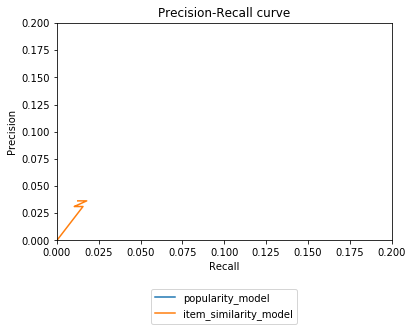

In [77]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")
